In [2]:
import nltk
import numpy as np
import matplotlib.pyplot as plt

from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import TruncatedSVD


In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [6]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/nlp_class/all_book_titles.txt

--2024-09-05 20:09:27--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/nlp_class/all_book_titles.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 127992 (125K) [text/plain]
Saving to: ‘all_book_titles.txt’

all_book_titles.txt 100%[===================>] 124.99K  --.-KB/s    in 0.02s   

2024-09-05 20:09:27 (6.99 MB/s) - ‘all_book_titles.txt’ saved [127992/127992]



In [7]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/nlp_class/stopwords.txt

--2024-09-05 20:09:44--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/nlp_class/stopwords.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2488 (2.4K) [text/plain]
Saving to: ‘stopwords.txt’

stopwords.txt       100%[===================>]   2.43K  --.-KB/s    in 0s      

2024-09-05 20:09:45 (36.0 MB/s) - ‘stopwords.txt’ saved [2488/2488]



In [8]:
wordnet_lemmatizer = WordNetLemmatizer()

titles = [line.rstrip() for line in open("all_book_titles.txt")]

stopwords = set(w.rstrip() for w in open("stopwords.txt"))
stopwords = stopwords.union({
    'introduction', 'edition', 'series', 'application', 'approach',
    'card', 'access', 'package', 'plus', 'etext', 'brief', 'vol',
    'fundamental', 'guide', 'essential', 'printed', 'third', 'second',
    'fourth',
})

In [9]:
def my_tokenizer(s):
    s = s.lower() # downcase
    tokens = nltk.tokenize.word_tokenize(s) # split string into words (tokens)
    tokens = [t for t in tokens if len(t) > 2] # remove short words, they're probably not useful
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens] # put words into base form
    tokens = [t for t in tokens if t not in stopwords] # remove stopwords
    tokens = [t for t in tokens if not any(c.isdigit() for c in t)]
    return tokens

In [20]:
word_index_map = {}
current_index = 0
all_tokens = []
all_titles = []
index_word_map = []

for title in titles:
    try:
        title = title.encode("ascii", "ignore").decode('utf-8')
        all_titles.append(title)
        tokens = my_tokenizer(title)
        all_tokens.append(tokens)
        for token in tokens:
            if token not in word_index_map:
                word_index_map[token] = current_index
                current_index += 1
                index_word_map.append(token)
    except:
        pass

In [24]:
index_word_map

['philosophy',
 'sex',
 'love',
 'reader',
 'reading',
 'judaism',
 'christianity',
 'islam',
 'microprocessor',
 'principle',
 'bernhard',
 'edouard',
 'fernow',
 'story',
 'north',
 'american',
 'forestry',
 'encyclopedia',
 'buddhism',
 'motorola',
 'family',
 'programming',
 'interfacing',
 'anthem',
 'student',
 'modern',
 'era',
 'read',
 'literature',
 'professor',
 'lively',
 'entertaining',
 'line',
 'mar',
 'woman',
 'venus',
 'secret',
 'improving',
 'communication',
 'lasting',
 'intimacy',
 'fulfillment',
 'giving',
 'receiving',
 'passion',
 'understanding',
 'martian',
 'religious',
 'tradition',
 'world',
 'journey',
 'africa',
 'mesoamerica',
 'america',
 'hinduism',
 'china',
 'wisdom',
 'sacred',
 'text',
 'religion',
 'illustrated',
 'soul',
 'cultivating',
 'life',
 'act',
 'thriving',
 'chaos',
 'handbook',
 'management',
 'revolution',
 'blood',
 'relative',
 'wheelock',
 'latin',
 'choice',
 'uncertainty',
 'luck',
 'thrive',
 'despite',
 'expanding',
 'discours

In [22]:
def tokens_to_vector(tokens):
    x = np.zeros(len(word_index_map))
    for t in tokens:
        i = word_index_map[t]
        x[i] = 1
    return x


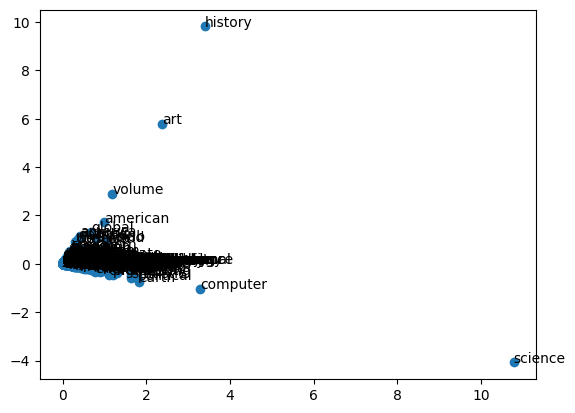

In [25]:
N = len(all_tokens)
D = len(word_index_map)
X = np.zeros((D, N))
i = 0
for tokens in all_tokens:
    X[:, i] = tokens_to_vector(tokens)
    i += 1

svd = TruncatedSVD()
Z = svd.fit_transform(X)

plt.scatter(Z[:,0], Z[:,1])
for i in range(D):
    plt.annotate(index_word_map[i], xy=(Z[i,0], Z[i,1]))

plt.show()